In [14]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("Daten/mundharm.csv", skiprows=2, delimiter=',')
signal = data[:,1]


Text(0, 0.5, 'Spannung in mV')

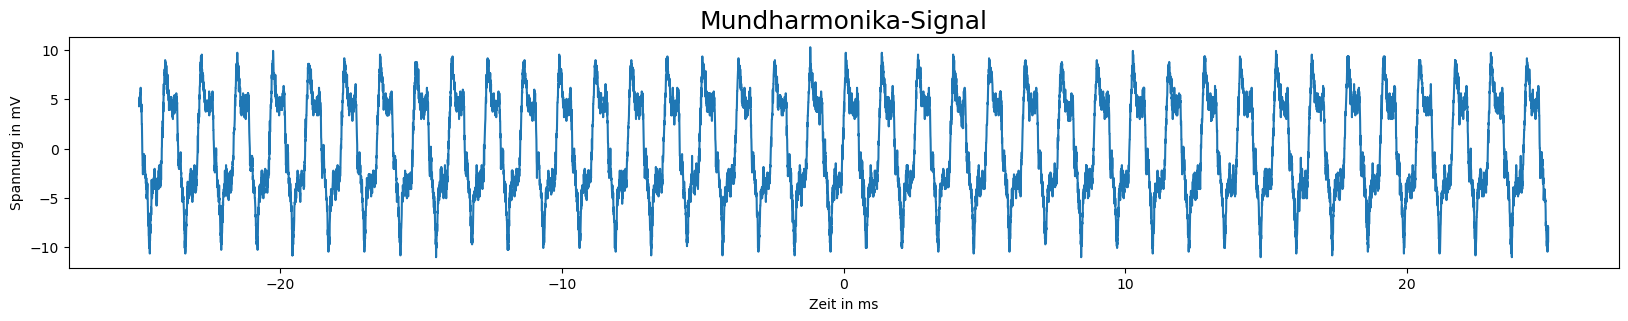

In [15]:
fig, axl = plt.subplots(figsize=(20,3))

axl.plot(data[:,0], data[:,1])
axl.set_title("Mundharmonika-Signal", fontsize=18)
axl.set_xlabel("Zeit in ms")
axl.set_ylabel("Spannung in mV")

# Teilausschnitt

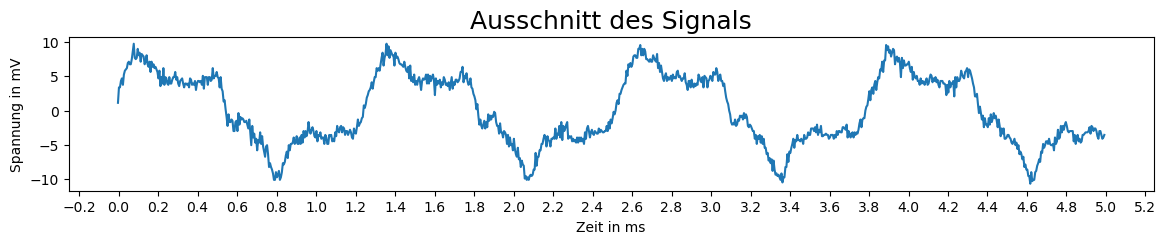

In [16]:
fig, axl = plt.subplots(figsize=(14,2))

axl.set_title("Ausschnitt des Signals", fontsize=18)
axl.set_xlabel("Zeit in ms")
axl.set_ylabel("Spannung in mV")
axl.locator_params(axis="x", nbins=40)
axl.plot(data[5000:6000,0], data[5000:6000,1])

In [17]:
Grundperiode = 1.25 # ms
Grundfrequenz = 1/(Grundperiode / 1000) # Hz
Signaldauer = np.round((np.abs(data[0,0]) + np.abs(data[-1,0])) / 1000, 4) # s
Abtastintervall = Signaldauer / data.shape[0] # Dauer zwischen Abtastpunkten in Sekunden
Abtastfrequenz = 1/Abtastintervall # Abtastpunkte in Hz
Signallaenge = signal.size

print("Grundperiode =", Grundperiode, "ms")
print("Grundfrequenz =", Grundfrequenz, "Hz")
print("Signaldauer =", Signaldauer, "s")
print("Signaldauer =", Signaldauer * 1000, "ms")
print("Abtastintervall =", Abtastintervall, "s")
print("Abtastintervall =", Abtastintervall * 1000, "ms")
print("Abtastfrequenz =", Abtastfrequenz, "Hz") 
print("Signallänge =", Signallaenge, "Abtastpunkte") # Anzahl der Abtastzeitpunkte

Grundperiode = 1.25 ms
Grundfrequenz = 800.0 Hz
Signaldauer = 0.05 s
Signaldauer = 50.0 ms
Abtastintervall = 4.998500449865041e-06 s
Abtastintervall = 0.0049985004498650405 ms
Abtastfrequenz = 200060.0 Hz
Signallänge = 10003 Abtastpunkte


(0.0, 10003.0)

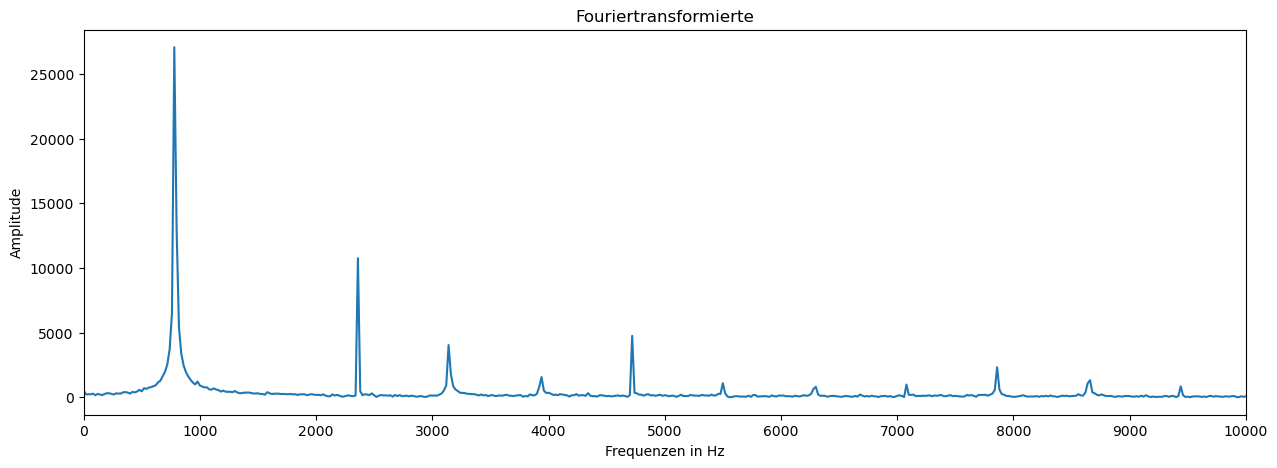

In [18]:
 # nächstgrößere 2er potzen
F = np.fft.fft(signal)
# Umrechnung des Spektrums in Herz

F_hertz = []

for n, freq in enumerate(F):
    F_hertz.append(n/(Signallaenge*Abtastintervall))
F_hertz = np.array(F_hertz) 

fig, axl = plt.subplots(figsize=(15,5))

axl.set_title("Fouriertransformierte")
axl.set_xlabel("Frequenzen in Hz")
axl.set_ylabel("Amplitude")
axl.plot(F_hertz[:len(F_hertz) // 2], np.abs(F[:len(F) // 2]))
ticks2 = np.arange(0, len(F_hertz), 1000)
axl.set_xticks(ticks2)
plt.xlim(0, len(F_hertz))

Alternative

Grundfrequenz: 25594.42485096364 mV, 793.695068359375 Hz


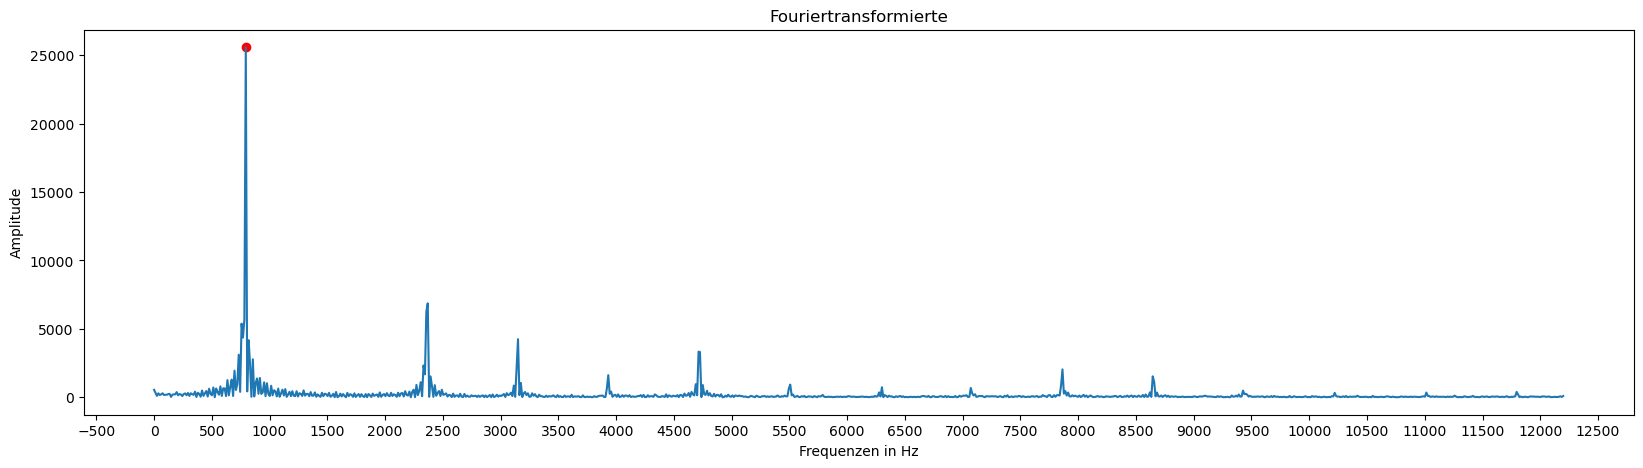

In [19]:
next_best_size = n=2 ** int(np.ceil(np.log2(Signallaenge)))
F = np.fft.fft(signal, next_best_size)
freq = np.fft.fftfreq(next_best_size, d=Abtastintervall)

fig, axl = plt.subplots(figsize=(20, 5))

freqc = freq[:1000]
Fc = F.real[:1000]
axl.set_title("Fouriertransformierte")
axl.set_xlabel("Frequenzen in Hz")
axl.set_ylabel("Amplitude")
axl.locator_params(axis="x", nbins=40)
axl.plot(freqc, np.abs(Fc))

max_index = np.argmax(np.abs(F.real[0:-1]))
mV, Hz = np.max(F.real[0:-1]), np.abs(freq)[0:-1][max_index]
print("Grundfrequenz:", mV, "mV,", Hz, "Hz")

axl.scatter(Hz, mV, color='r')

# 2. Frequenzgang von Lautsprechen

Der Output (Lautsprecher) war immer auf `2V` gestellt.

In [20]:
# Freq (Hz),Mikrofon (mV),Cycle Time (ms),Phasenverschiebung (ms)
kleiner_data = np.loadtxt("./Daten/Kleiner Lautsprecher bei 2V.CSV", skiprows=1, delimiter=",")

# Freq (Hz),Mikrofon (mV),Phasenversch (ms)
grosser_data = np.loadtxt("./Daten/Versuch3_SSS_Großer.csv", skiprows=1, delimiter=",")

cycle_time = kleiner_data[:, 2]

## Daten

Text(0.5, 1.0, 'Grosser')

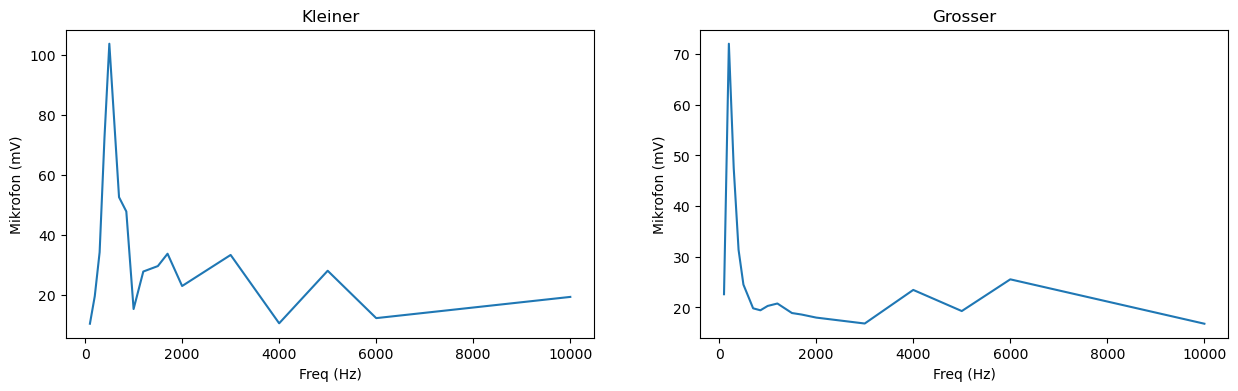

In [21]:
fig, (axl, axr) = plt.subplots(ncols=2, figsize=(15, 4))

axl.plot(kleiner_data[:, 0], kleiner_data[:, 1], label="Mikrofon")
axl.set_xlabel("Freq (Hz)")
axl.set_ylabel("Mikrofon (mV)")
axl.set_title("Kleiner")

axr.plot(grosser_data[:, 0], grosser_data[:, 1], label="Mikrofon")
axr.set_xlabel("Freq (Hz)")
axr.set_ylabel("Mikrofon (mV)")
axr.set_title("Grosser")

## Kleiner

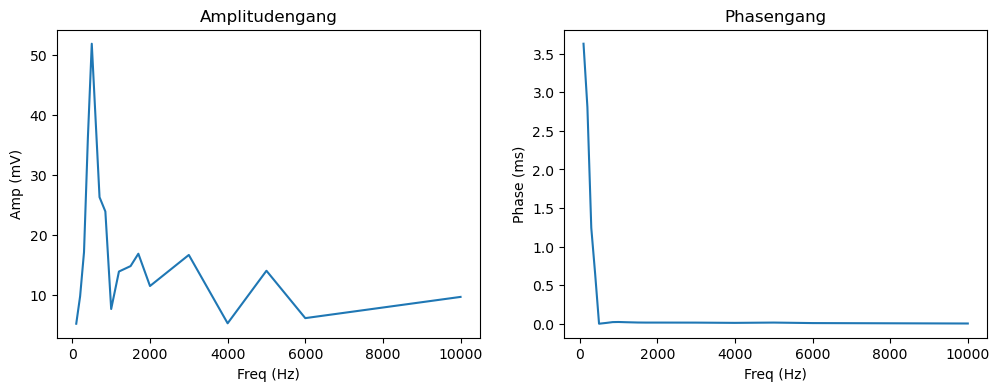

In [22]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))

base = 2

ax1.set_title("Amplitudengang")
ax1.set_xlabel("Freq (Hz)")
ax1.set_ylabel("Amp (mV)")
ax1.plot(kleiner_data[:,0], kleiner_data[:,1]/base)

ax2.set_title("Phasengang")
ax2.set_xlabel("Freq (Hz)")
ax2.set_ylabel("Phase (ms)")
ax2.plot(kleiner_data[:,0], kleiner_data[:,3])

## Großer

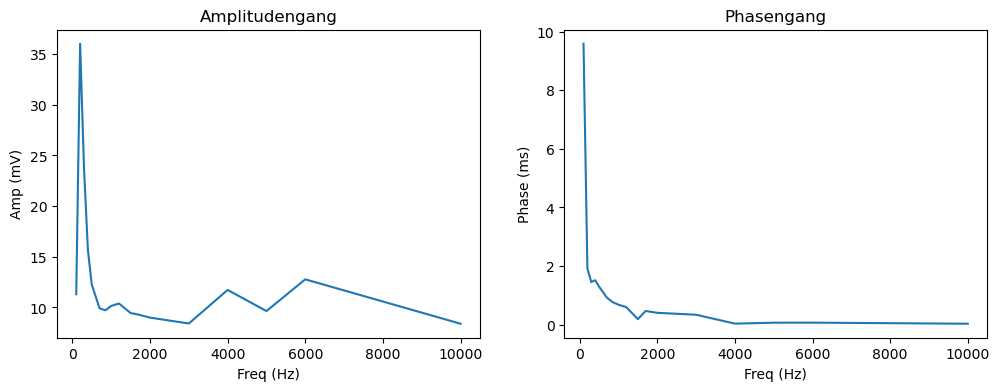

In [23]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))

base = 2

ax1.set_title("Amplitudengang")
ax1.set_xlabel("Freq (Hz)")
ax1.set_ylabel("Amp (mV)")
ax1.plot(grosser_data[:,0], grosser_data[:,1]/base)

ax2.set_title("Phasengang")
ax2.set_xlabel("Freq (Hz)")
ax2.set_ylabel("Phase (ms)")
ax2.plot(grosser_data[:,0], grosser_data[:,2])

# Amplitudengang & Phasengang

## Kleiner

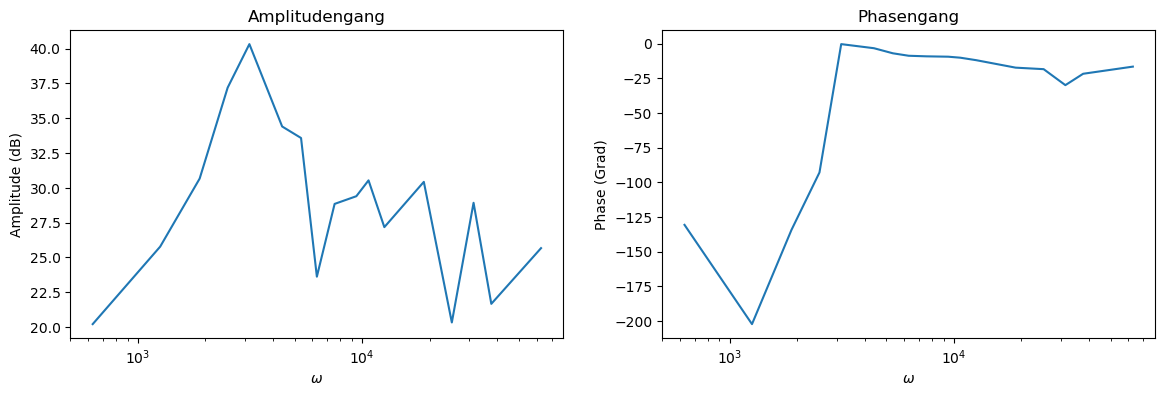

In [24]:
fig, (axl, axr) = plt.subplots(ncols=2, figsize=(14, 4))

axl.set_xlabel("$\omega$")
axl.set_ylabel("Amplitude (dB)")
axl.set_title("Amplitudengang")
axl.semilogx(kleiner_data[:, 0] * 2 * np.pi, 20*np.log10(kleiner_data[:, 1]))

kleiner_phase = -kleiner_data[:, 3]/1000 * kleiner_data[:, 0] * 360

axr.set_xlabel("$\omega$")
axr.set_ylabel("Phase (Grad)")
axr.set_title("Phasengang")

axr.semilogx(kleiner_data[:, 0] * 2 * np.pi, kleiner_phase)

## Großer

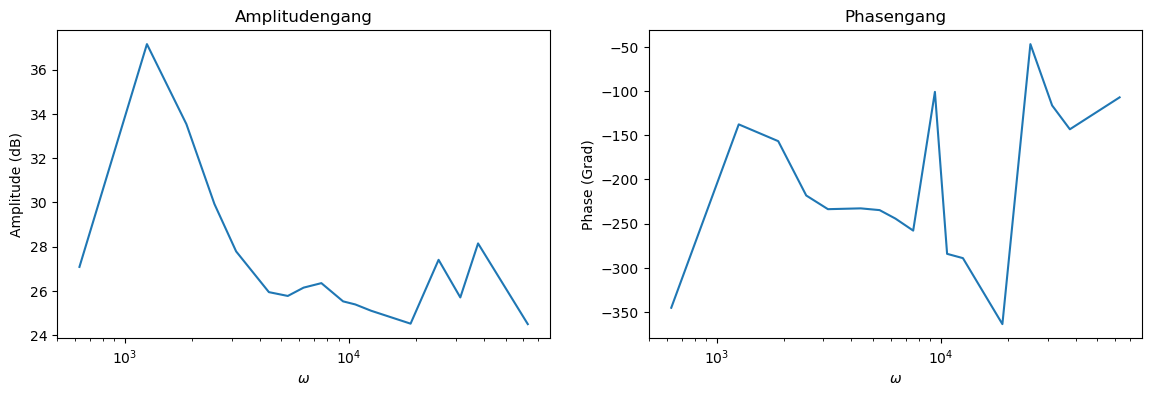

In [27]:
fig, (axl, axr) = plt.subplots(ncols=2, figsize=(14, 4))

axl.set_xlabel("$\omega$")
axl.set_ylabel("Amplitude (dB)")
axl.set_title("Amplitudengang")
axl.semilogx(grosser_data[:, 0] * 2 * np.pi, 20*np.log10(grosser_data[:, 1]))

grosser_phase = -grosser_data[:, 2]/1000 * grosser_data[:, 0] * 360

axr.set_xlabel("$\omega$")
axr.set_ylabel("Phase (Grad)")
axr.set_title("Phasengang")

axr.semilogx(grosser_data[:, 0] * 2 * np.pi, grosser_phase)